## Introduction

* The course demonstrates techniques on how to use a reasoning model - specifically OpenAI o1
* Techniques like CoT, Multi-step, self-consistency prompting etc. can be covered

image.png

* Test-time and inference-time scaling, RL with more train-time compute and more test-time and inference-time compute - techniques used to improve the reasoning capabilities of an LLM
* When you'd want to use a reasoning model, and when a smaller, simpler model

* Practical example in supply chain:
  * A reasoning model like o1 to plan steps to a complex task
  * A simpler smaller model for execution

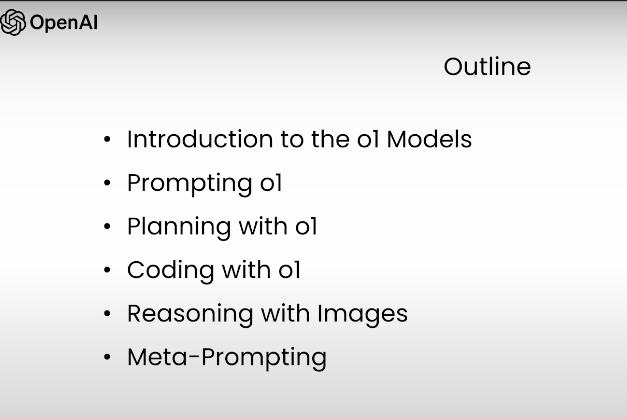

* Meta-prompting - basically, an LLM used to improve your prompt quality

## Introduction to o1

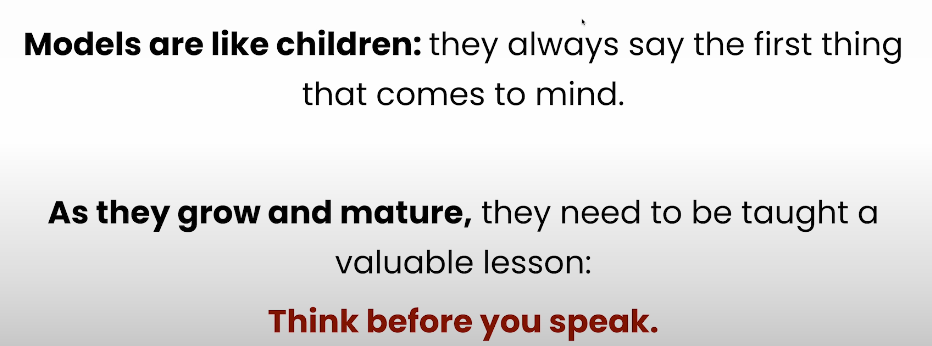

* o1 is explicitly trained to think before it speaks.

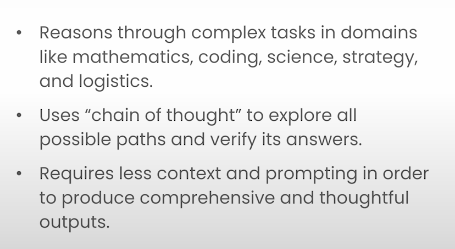

* Incorporates reasoning by leveraging CoT in different ways - it may be explicit or implicit

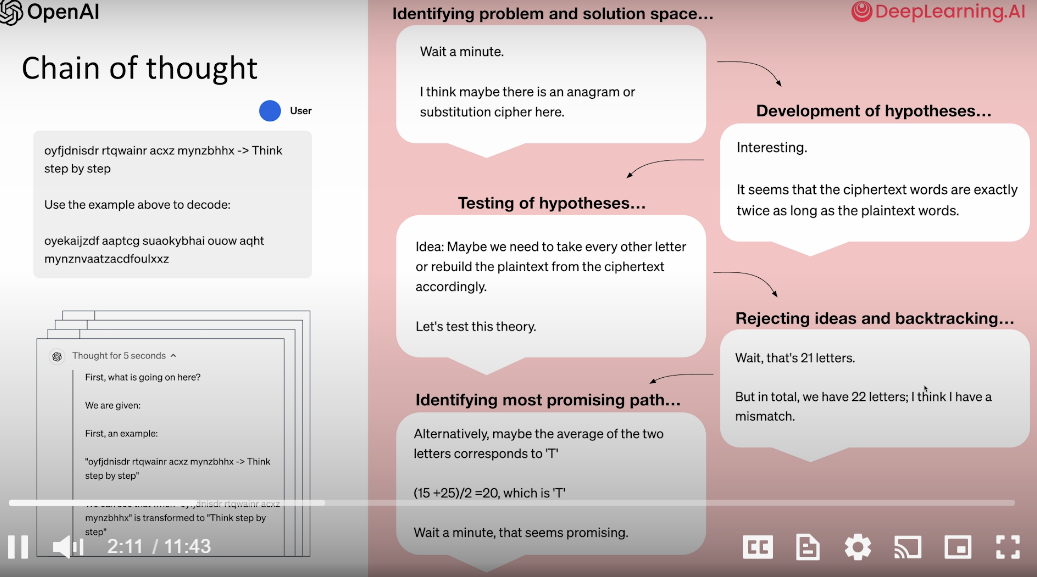

* O1 is natively trained to include this reasoning with hypothesis process, without you needing to prompt it for so. Hence does excellent on science, math, code tasks.

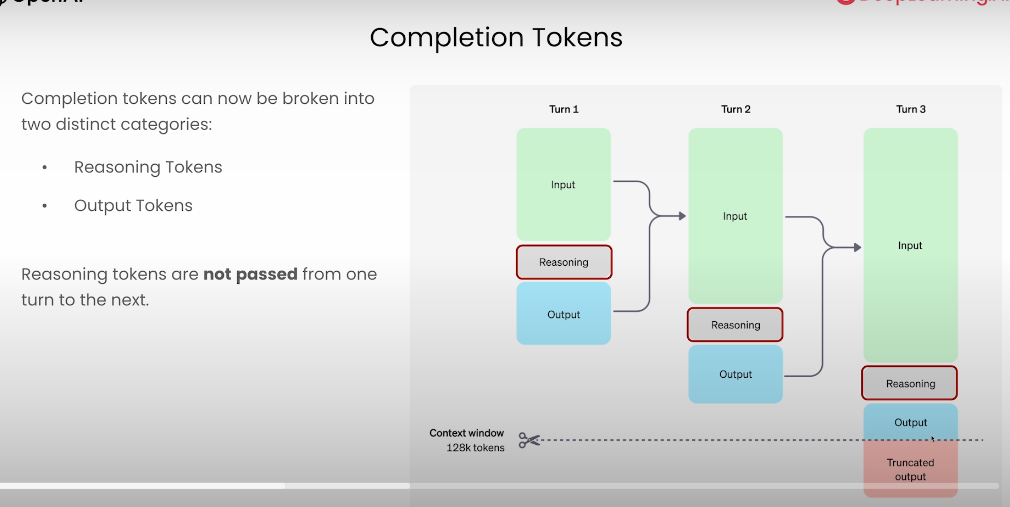

* You will have to explicitly prompt to pass the reasoning tokens ahead - however consider the costs that you will be incurred with using that many tokens

* more RL during training improved model performance, but we got even better results with more "thinking" during test-time.

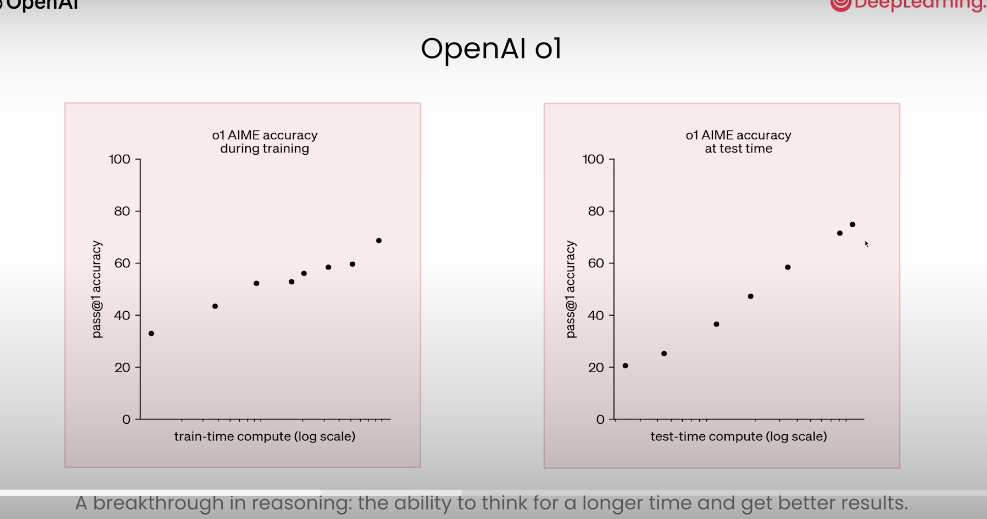

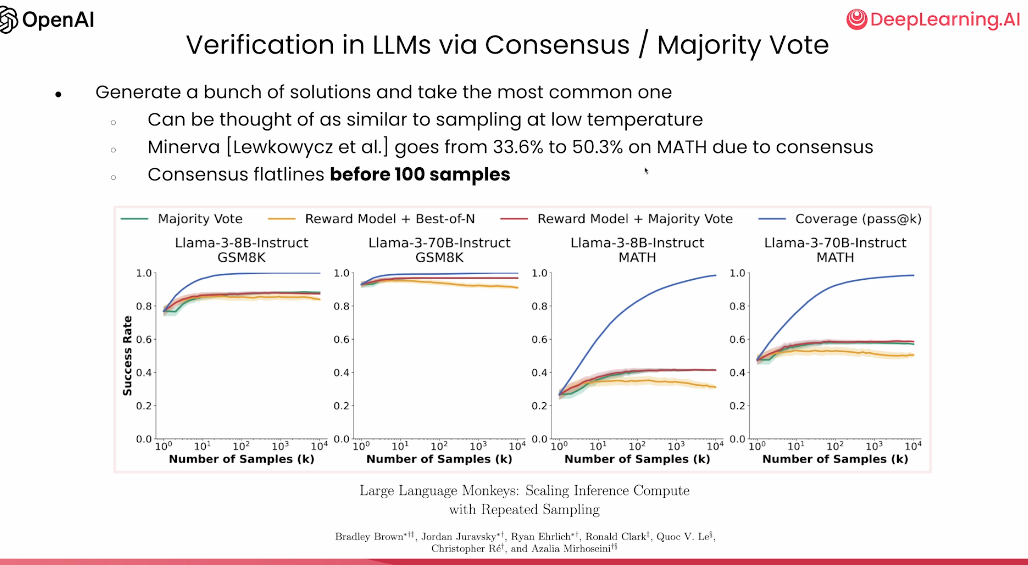

* What is the significance of all these breakthroughs?

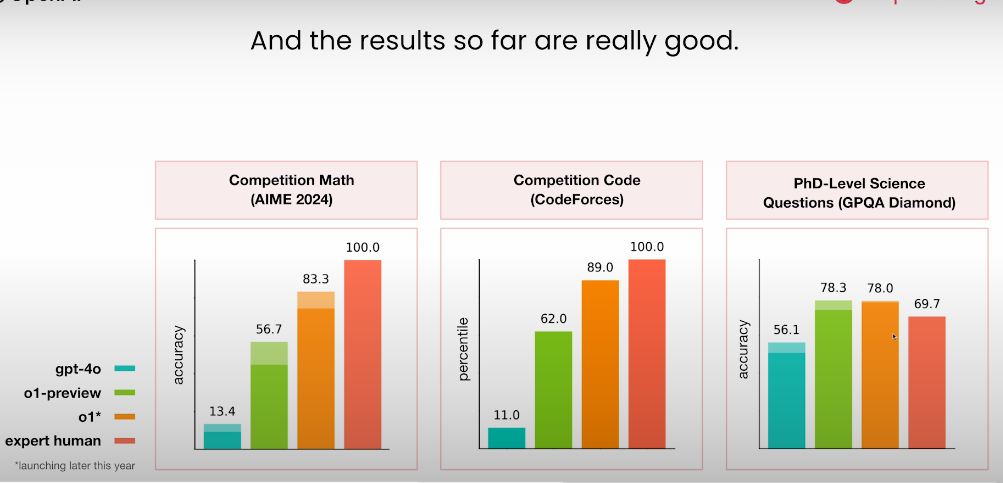

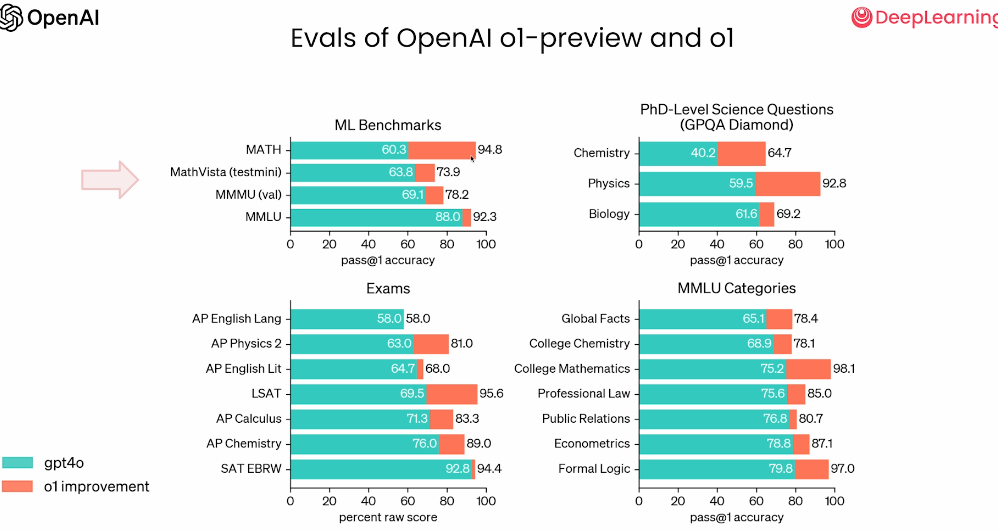

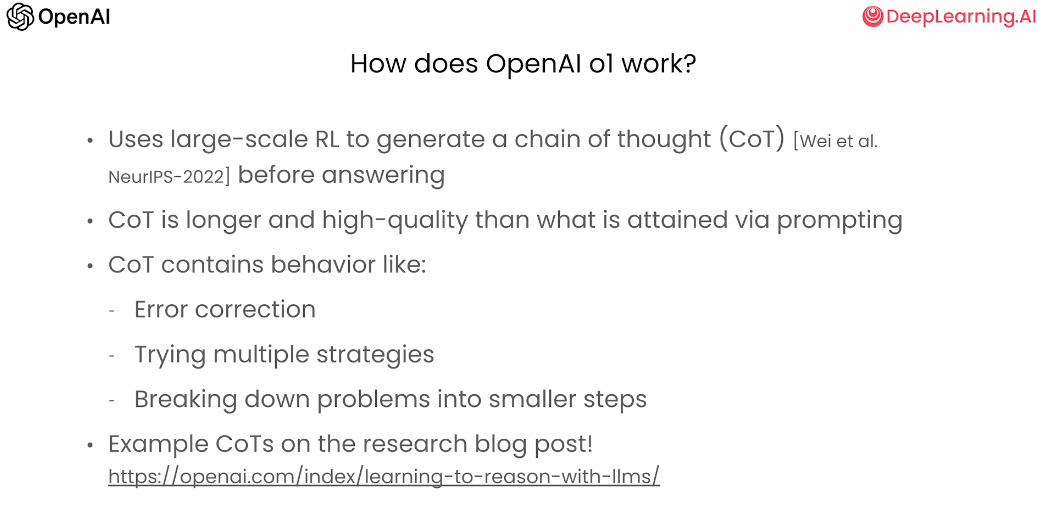

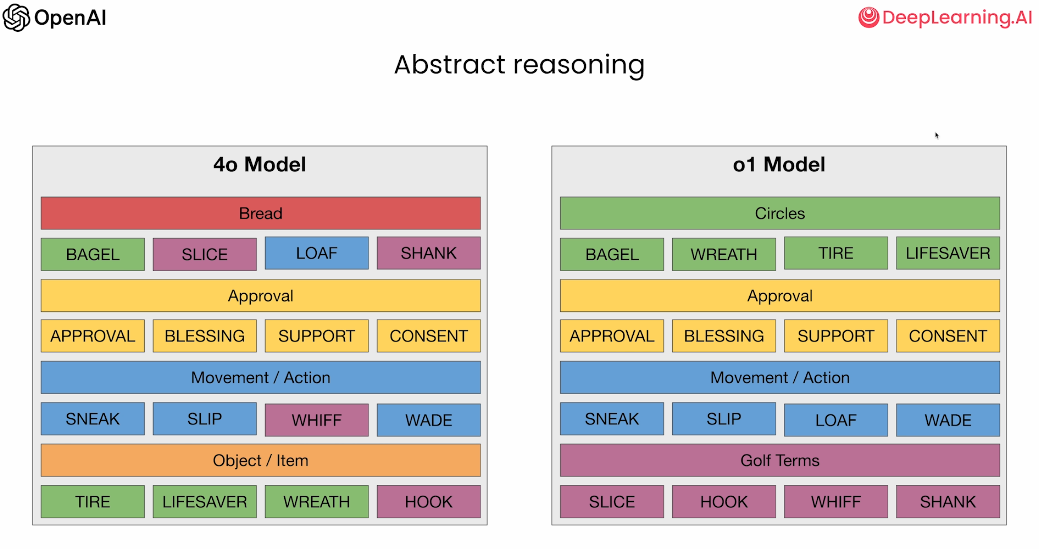

* Abstract reasoning demonstrated another emergent reasoning capability of reasoning models apart from specialised tasks like math, code, science, strategy.

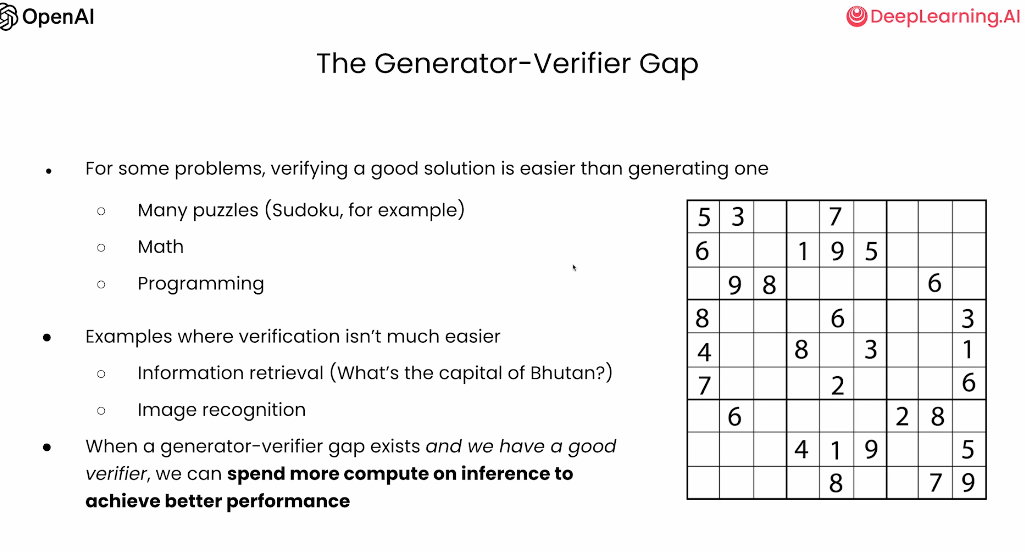

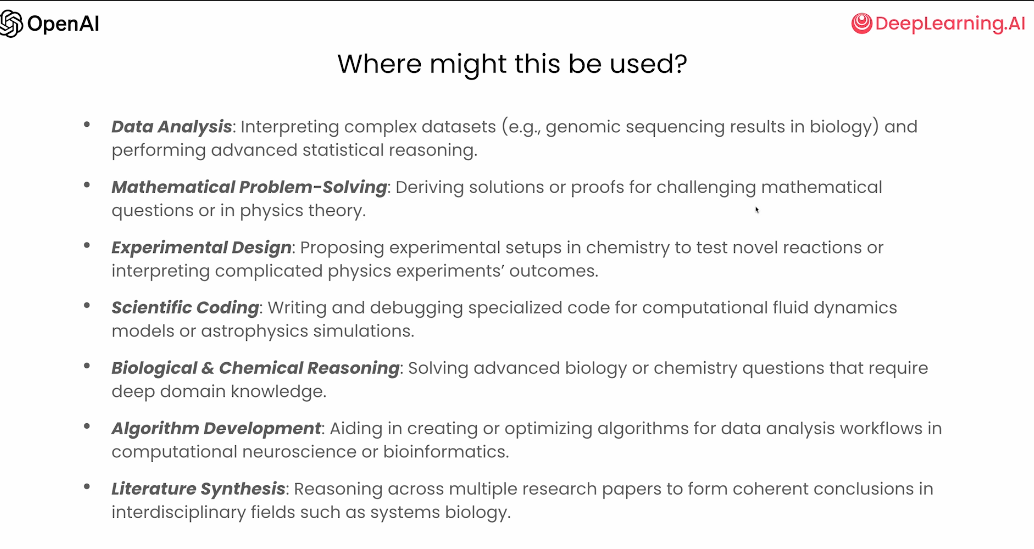

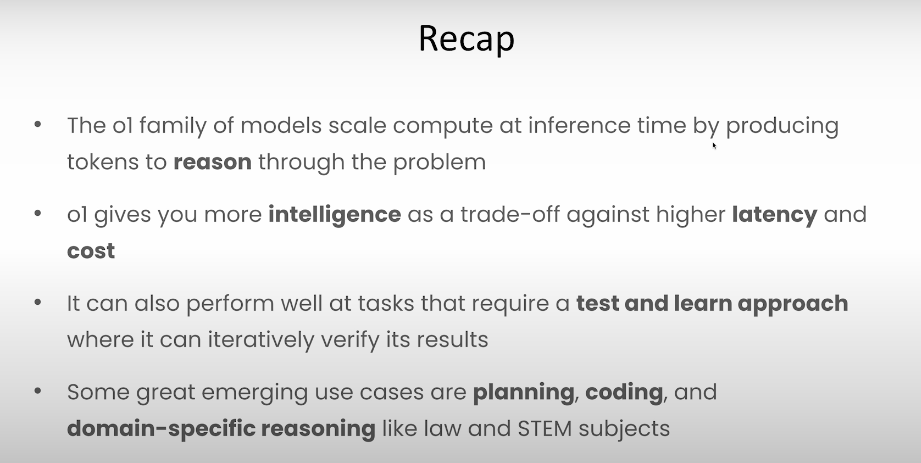

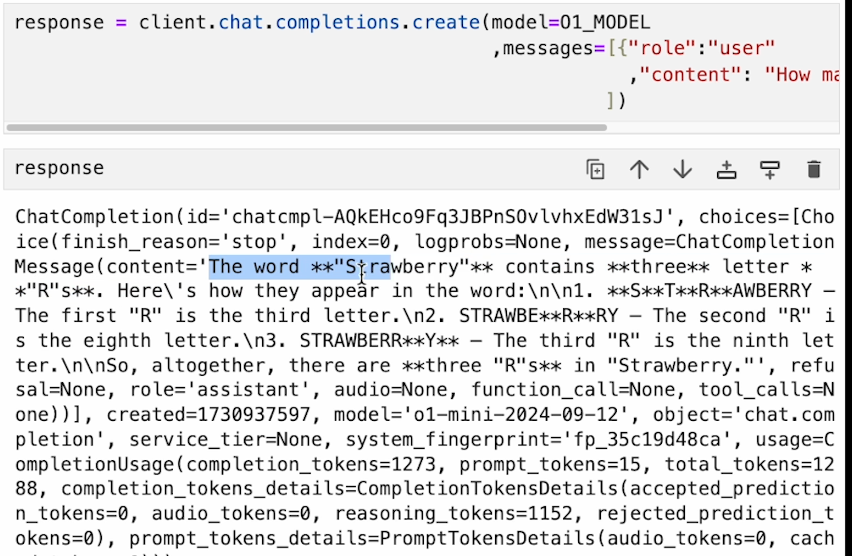

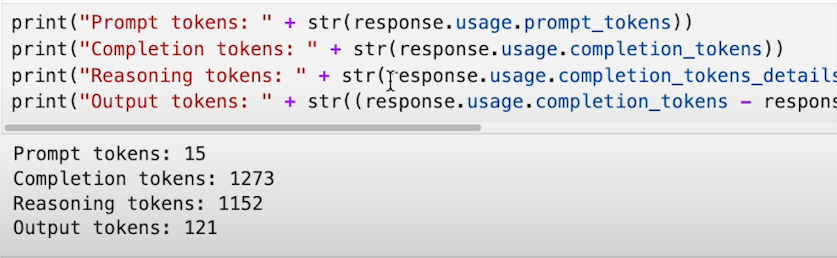

* Above clips highlights the trade-offs of using o1.
* Hence we do not use o1 in each case - you use them where the "thinking" gives value against the compute trade-off.

## Prompting o1

* ```L2.ipynb``` attached as a resource for this lesson.

4 principles of prompting o1:

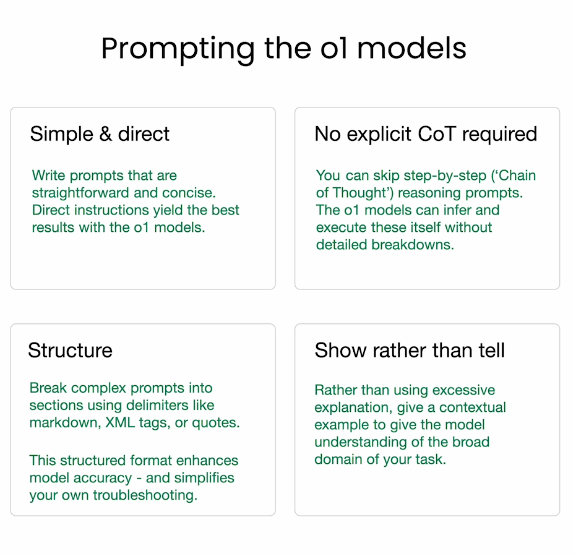

## Planning with o1

* Trade-off between intelligence with latency and cost is often used in practical use-cases
* In this lesson, we will plan using a reasoning model like o1, and execute the tasks with a simpler and smaller model like 4o.

*```L3.ipynb``` attached

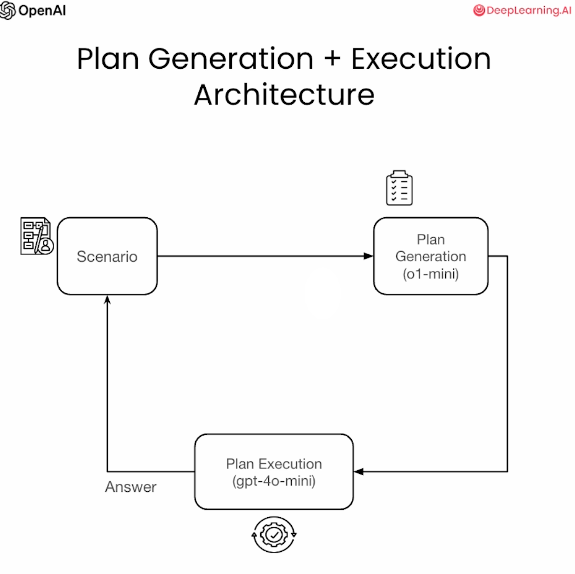

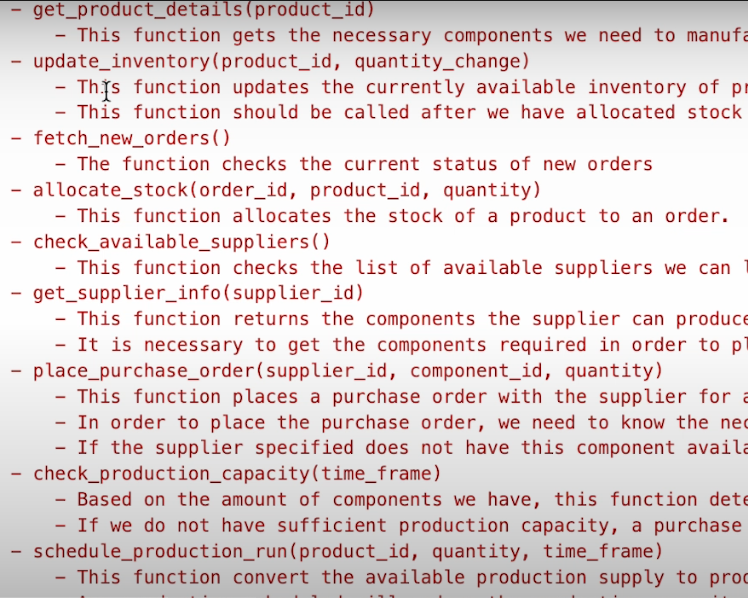

* The above clip was like the ```register_for_llm``` in autogen, the LLM needs to know what functions the executor can execute and hence plan accordingly.

* o1 can do function calling, but here we are using it only to create a plan for how the functions should be used, and will use a different Worker agent to execute the functions.

image.png

8:13: helping functions for orchestration of agents.

* The example implements a complete agentic workflow where o1 acts as an orchestrator developing a plan for 4o-mini that was executed step-by-step
* Now step back and analyze where YOU have the opportunity to utilize such agentic workflow.

## Coding with o1

* Simulating a coding competition between 4o and o1

```L4.ipynb``` attached

## Reasoning with Images

```L5.ipynb``` attached

* Understanding images with 4o can go well but often needs few-shot, fine-tuning and CoT, conversely, o1 can perform well for images right out of the box.
* This is due to the test and learn approach it follows while its "thinking" that helps to detect hallucinations before providing an answer.
* One use-case is taking the "thinking" costs of o1 upfront to preprocess an image, indexing it with rich details and later use this pre-processed info for q&a later.

image.png

* It was seen that 4o could give high-level abstraction of an image, but when asked about more nuanced interpretations or details like "where does this arrow point to", it provided inconsistent answers, where the model required much more fine-tuning or advanced prompting strategies.

* Think how we can use the example of ER-diagrams with o1-vision, (```L5.ipynb```).

* Example: you may want to ask to generate table of order records that link these product ids with client tables, and get it to generate sql to query the three tables.

## Meta-prompting

* Optimizing to production is one of the biggest painpoints we've seen developers experience with working with LLMs - with so much guidance for prompt engineering, RAG and fine-tuning out there, figuring out which optimization you need to hill-climb on your evals can be a difficult problem to frame and solve.

* Luckily, it appears to be one of the use cases that o1 is capable at. In this session we'll focus on how to use o1-mini to work with a set of evals to optimize our prompt for the task and improve score on our evals.

* Meta-prompting - practise of using an intelligent model like o1 to iteratively improve the performance and intelligence of a smaller model

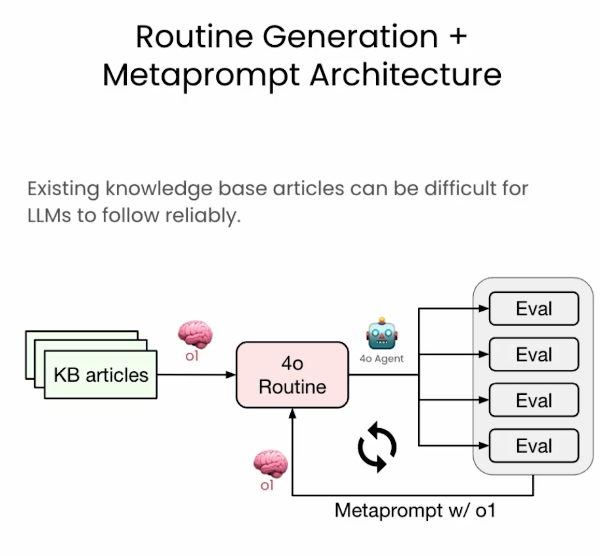

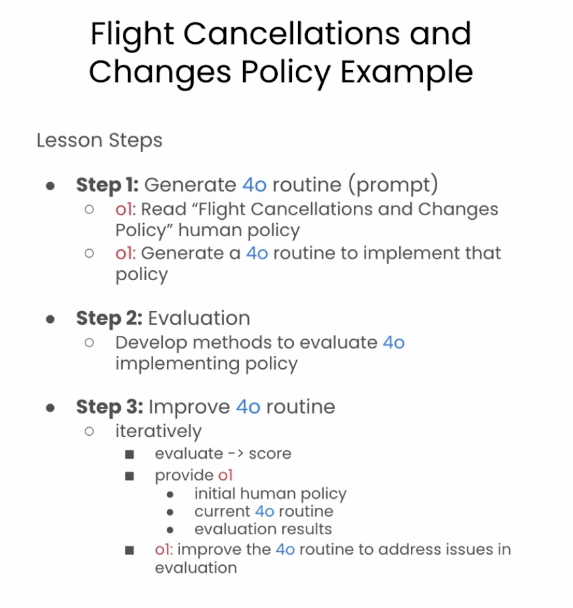

image.png

* We evaluate the conversation with 2 criteria:
  * Correct tool was called
  * Correct arguements were passed

* The example in SS above is a more generic example, not specific to meta-prompting.
* Meta-prompting will help our model to optimize its routines, give more options to optimize and enable the agent to perform better in subsequent iterations.

* you might want to set ```parallel_tool_calls``` as ```True``` in your use-case, here it is ```False``` for simplicity purposes.

* I am realising how AutoGen makes all these things easier, in the example the instructor manually sets up what can be done by ```max_turns```, creating Customer Agent, Customer Support Agent, Planner Agent etc.

* What is ```tiktoken```?